In [1]:
%matplotlib notebook
import numpy as np
import math
import time
from matplotlib import animation, rc
from IPython.display import HTML

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    ttl.set_text('')
    
    return (line1,line2,ttl)

In [2]:
def force_es(r):
    F = np.zeros(2)
    Fmag = GG*Me*Ms/(np.linalg.norm(r)+1e-20)**2
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0] = Fmag * np.cos(theta)
    F[1] = Fmag * np.sin(theta)
    if r[0] > 0:
        F[0] = -F[0]
    if r[1] > 0:
        F[1] = -F[1]
        
    return F

In [3]:
def force_js(r):
    F = np.zeros(2)
    Fmag = GG*Mj*Ms/(np.linalg.norm(r)+1e-20)**2
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0] = Fmag * np.cos(theta)
    F[1] = Fmag * np.sin(theta)
    if r[0] > 0:
        F[0] = -F[0]
    if r[1] > 0:
        F[1] = -F[1]
        
    return F

def force_ej(re,rj):
    
    r = np.zeros(2)
    F = np.zeros(2)
    r[0] = re[0] - rj[0]    
    r[1] = re[1] - rj[1]    
    Fmag = GG*Me*Mj/(np.linalg.norm(r)+1e-20)**2
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0] = Fmag * np.cos(theta)
    F[1] = Fmag * np.sin(theta)
    if r[0] > 0:
        F[0] = -F[0]
    if r[1] > 0:
        F[1] = -F[1]
        
    return F

In [4]:
def force(r,planet,r_dash,v_dash):
    if planet == 'earth':
        return force_es(r) + force_ej(r,r_dash)
    if planet == 'jupiter':
        return force_js(r) - force_ej(r,r_dash)
def dr_dt(t,r,v,planet,ro,vo):
    return v
 
    
def dv_dt(t,r,v,planet,ro,vo):
    F = force(r,planet,ro,vo)
    if planet == 'earth':
        y = F/Me
    if planet == 'jupiter':
        y = F/Mj
    return y 

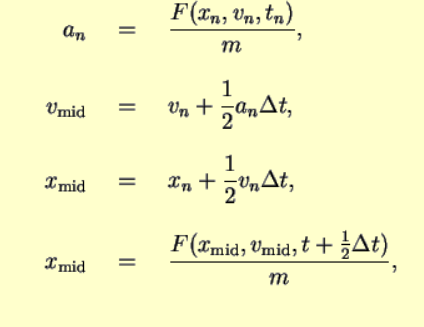

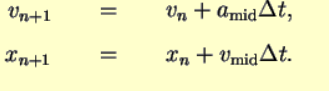

In [5]:
def EulerSolver(t,r,v,h,planet,r_dash,v_dash):
    z = np.zeros([2,2])
    r1 = r + h*dr_dt(t,r,v,planet,r_dash,v_dash)
    v1 = v + h*dv_dt(t,r,v,planet,r_dash,v_dash)
    z = [r1, v1]
    return z
def mplot(fign,x,y,xl,yl,clr,lbl):
    py.figure(fign)
    py.xlabel(xl)    
    py.ylabel(yl)
    return py.plot(x,y,clr, linewidth =1.0,label = lbl)

Me = 6e24                     # Mass of Earth in kg
Ms = 2e30                     # Mass of Sun in kg                       
Mj = 1.9e27                   # Mass of Jupiter

G = 6.673e-11                 # Gravitational Constant

RR = 1.496e11                 # Normalizing distance in km (= 1 AU)
MM = 6e24                     # Normalizing mass
TT = 365*24*60*60.0           # Normalizing time (1 year)

FF = (G*MM**2)/RR**2          # Unit force
EE = FF*RR                    # Unit energy

GG = (MM*G*TT**2)/(RR**3)

Me = Me/MM                    # Normalized mass of Earth
Ms = Ms/MM                    # Normalized mass of Sun  
Mj = 500*Mj/MM                # Normalized mass of Jupiter/Super Jupiter


ti = 0                # initial time = 0
tf = 120              # final time = 120 years

 



N = 100*tf                   # 100 points per year
t = np.linspace(ti,tf,N)     # time array from ti to tf with N points 

h = t[2]-t[1]                # time step (uniform)

r = np.zeros([N,2])         # position vector of Earth
v = np.zeros([N,2])         # velocity vector of Earth
rj = np.zeros([N,2])        # position vector of Jupiter
vj = np.zeros([N,2])        # velocity vector of Jupiter

ri = [1496e8/RR,0]      # initial position of earth
rji = [5.2,0]           # initial position of Jupiter




vv = np.sqrt(Ms*GG/ri[0])         # Magnitude of Earth's initial velocity 

vvj = 13.06e3 * TT/RR             # Magnitude of Jupiter's initial velocity 

vi = [0, vv*1.0]                  # Initial velocity vector for Earth.Taken to be along y direction as ri is on x axis.
vji = [0, vvj*1.0]                # Initial velocity vector for Jupiter


# Initializing the arrays with initial values.
t[0] = ti
r[0,:] = ri
v[0,:] = vi
rj[0,:] = rji
vj[0,:] = vji

for i in range(0,N-1):
    [r[i+1,:],v[i+1,:]]=EulerSolver(t[i],r[i,:],v[i,:],h,'earth',rj[i,:],vj[i,:])
    [rj[i+1,:],vj[i+1,:]]=EulerSolver(t[i],rj[i,:],vj[i,:],h,'jupiter',r[i,:],v[i,:])
rj        

array([[ 5.2       ,  0.        ],
       [ 5.2       ,  0.02753305],
       [ 5.19985337,  0.05506611],
       ...,
       [-6.86441493,  2.84272302],
       [-6.87354756,  2.82136468],
       [-6.88261383,  2.79997885]])

In [6]:
import pylab as py
lbl = 'orbit'
py.plot(0,0,'ro',linewidth = 7)
mplot(1,r[:,0],r[:,1],r'$x$ position (AU)',r'$y$ position (AU)','blue','Earth')
mplot(1,rj[:,0],rj[:,1],r'$x$ position (AU)',r'$y$ position (AU)','green','Super Jupiter')
py.ylim([-9, 9])


<IPython.core.display.Javascript object>

(-9.0, 9.0)

In [7]:
def animate(i):
    earth_trail = 40;
    jupiter_trail = 200;
    tm_yr = 'Elapsed time = ' + str(round(t[i],1)) + ' years'
    ttl.set_text(tm_yr)
    line1.set_data(r[i:max(1,i-earth_trail):-1,0], r[i:max(1,i-earth_trail):-1,1])
    line2.set_data(rj[i:max(1,i-jupiter_trail):-1,0], rj[i:max(1,i-jupiter_trail):-1,1])
    

    return (line1,line2)
fig, ax = py.subplots()
ax.axis('square')
ax.set_xlim(( -7.2, 7.2))
ax.set_ylim((-7.2, 7.2))
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

ax.plot(0,0,'o',markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813" )
line1, = ax.plot([], [], 'o-',color = '#d2eeff',markevery=10000, markerfacecolor = '#0077BE',lw=2)   # line for Earth
line2, = ax.plot([], [], 'o-',color = '#e3dccb',markersize = 8, markerfacecolor = '#f66338',lw=2,markevery=10000)   # line for Jupiter


ax.plot([-6,-5],[6.5,6.5],'r-')
ax.text(-4.5,6.3,r'1 AU = $1.496 \times 10^8$ km')

ax.plot(-6,-6.2,'o', color = '#d2eeff', markerfacecolor = '#0077BE')
ax.text(-5.5,-6.4,'Earth')

ax.plot(-3.3,-6.2,'o', color = '#e3dccb',markersize = 8, markerfacecolor = '#f66338')
ax.text(-2.9,-6.4,'Super Jupiter (500x mass)')

ax.plot(5,-6.2,'o', markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
ax.text(5.5,-6.4,'Sun')
ttl = ax.text(0.24, 1.05, '', transform = ax.transAxes, va='center')
#plt.title('Elapsed time, T=%i years' %u)


<IPython.core.display.Javascript object>